In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error

import calendar
import holidays

import pmdarima as pm
from statsmodels.tsa.stattools import adfuller, acf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-regioni/dpc-covid19-ita-regioni.csv', parse_dates=['data'])
df = df[['data', 'nuovi_positivi']]
df['data'] = pd.to_datetime(df['data']).dt.normalize()

today = df['data'].iloc[-1]
tomorrow = today + pd.DateOffset(days=1)

df_italy = df.groupby('data').sum()

In [3]:
print(df_italy.index[0])
print(df_italy.nuovi_positivi)
print(df_italy.nuovi_positivi.values)

2020-02-24 00:00:00
data
2020-02-24    221
2020-02-25     93
2020-02-26     78
2020-02-27    250
2020-02-28    238
             ... 
2024-03-02    167
2024-03-03     68
2024-03-04     48
2024-03-05    263
2024-03-06    135
Name: nuovi_positivi, Length: 1473, dtype: int64
[221  93  78 ...  48 263 135]


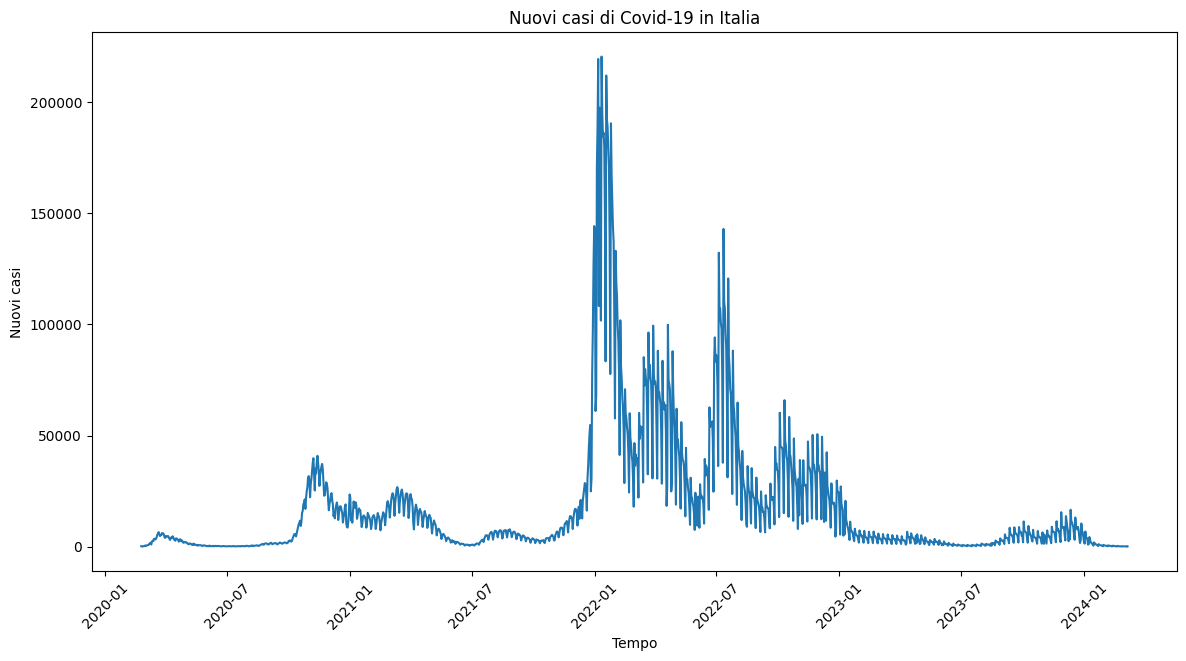

In [4]:
plt.rcParams['figure.figsize'] = [14, 7]
# Create the plot
plt.plot(df['data'].unique(), df_italy['nuovi_positivi'], linestyle='solid')

# Add title and axis labels
plt.title('Nuovi casi di Covid-19 in Italia')
plt.xlabel('Tempo')
plt.ylabel('Nuovi casi')
plt.xticks(rotation=45)

# Display the plot
plt.show()

In [5]:
result = adfuller(df_italy.nuovi_positivi.values)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('lags used: %f' % result[2])
print('observations: %f' % result[3])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.271685
p-value: 0.000497
lags used: 17.000000
observations: 1455.000000
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568


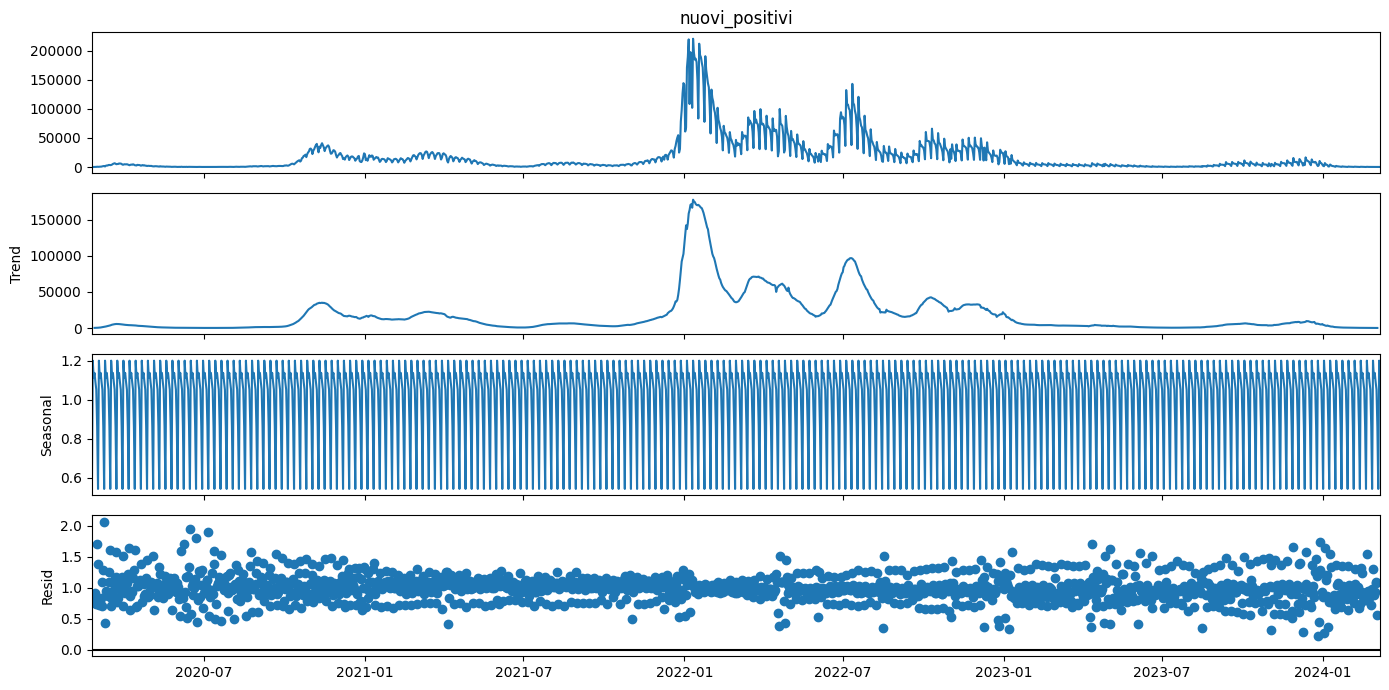

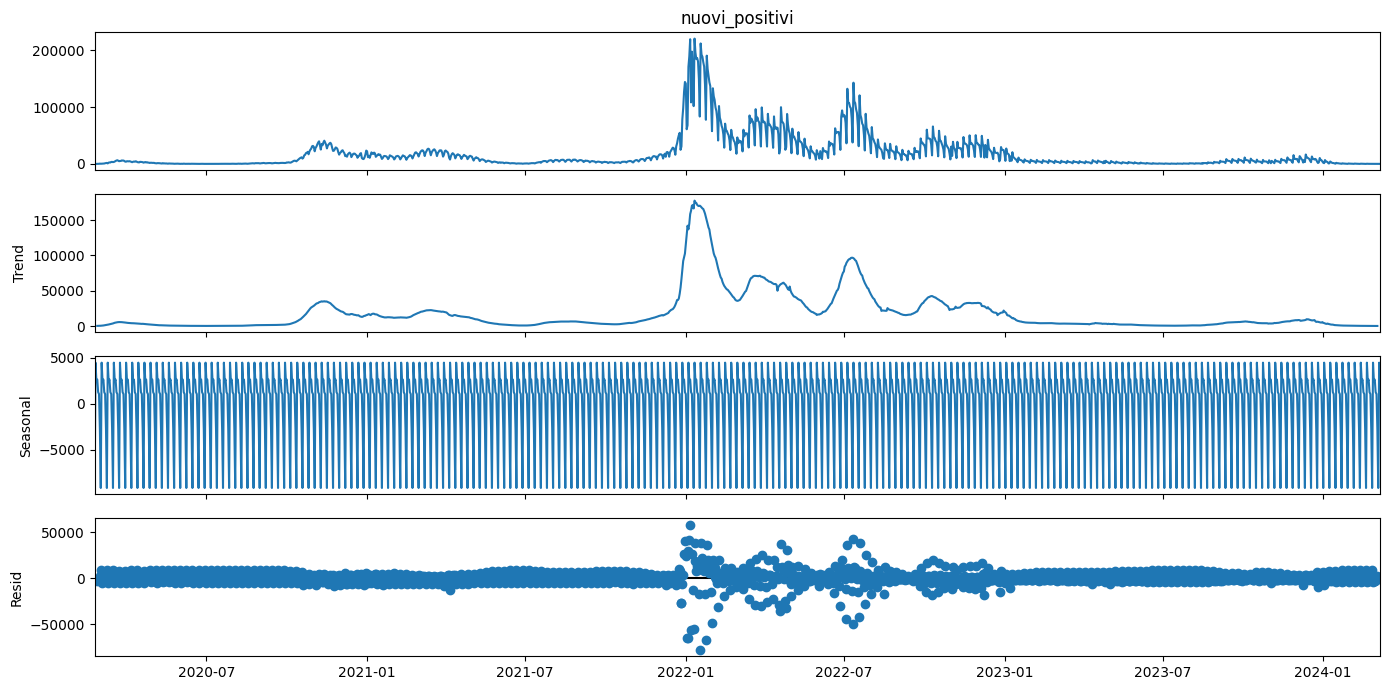

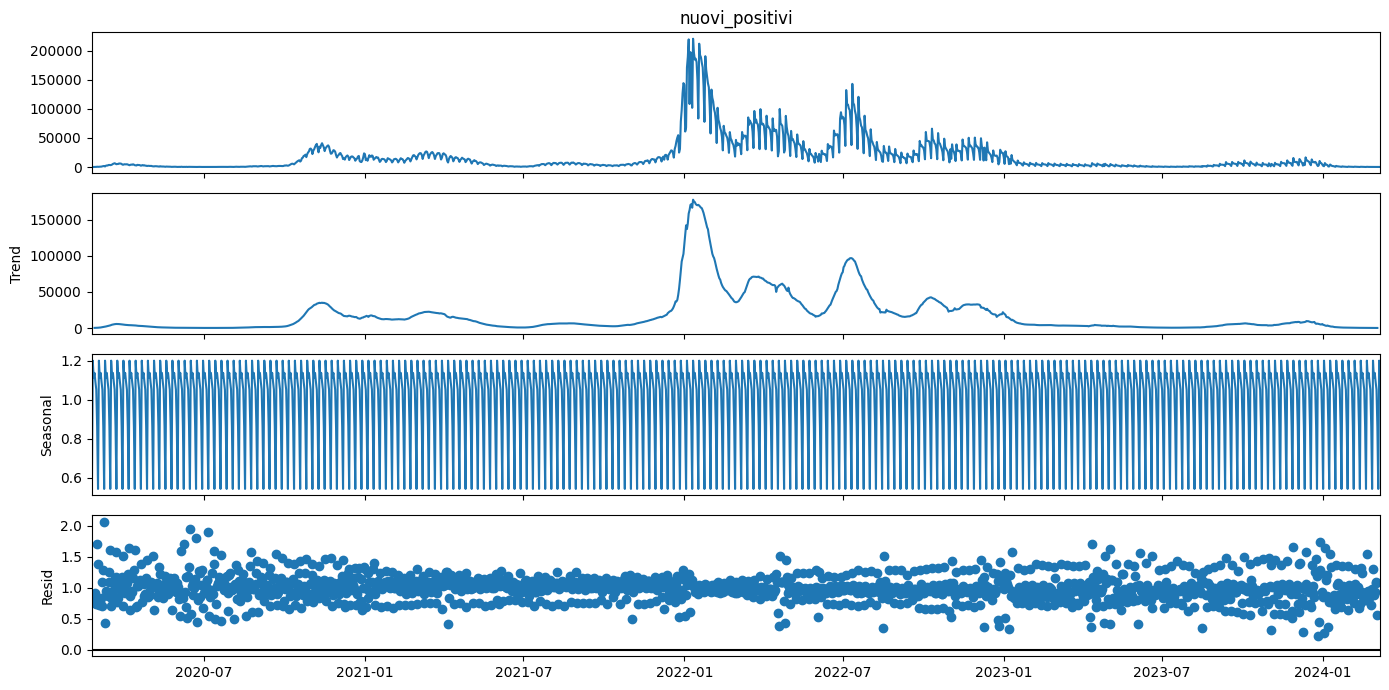

In [6]:
seasonal_decompose(df_italy.nuovi_positivi, model='additive').plot()
seasonal_decompose(df_italy.nuovi_positivi, model='multiplicative').plot()

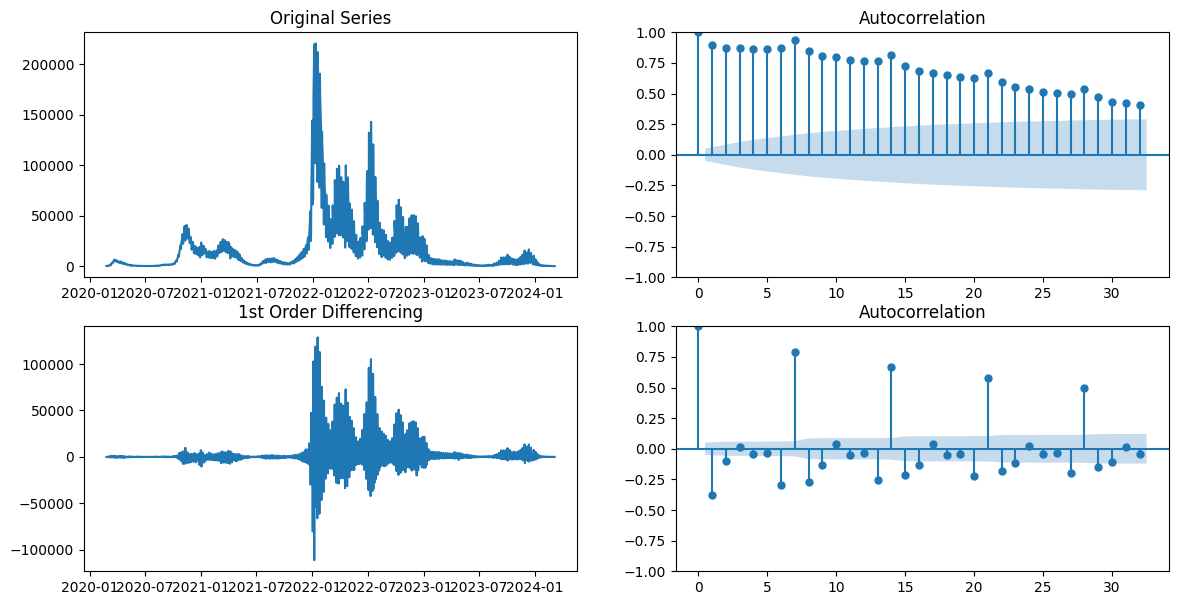

In [7]:
fig, axes = plt.subplots(2, 2)
axes[0, 0].plot(df_italy)
axes[0, 0].set_title('Original Series')
plot_acf(df_italy, ax=axes[0, 1])

axes[1, 0].plot(df_italy.diff())
axes[1, 0].set_title('1st Order Differencing')
plot_acf(df_italy.diff().dropna(), ax=axes[1, 1])

plt.show()

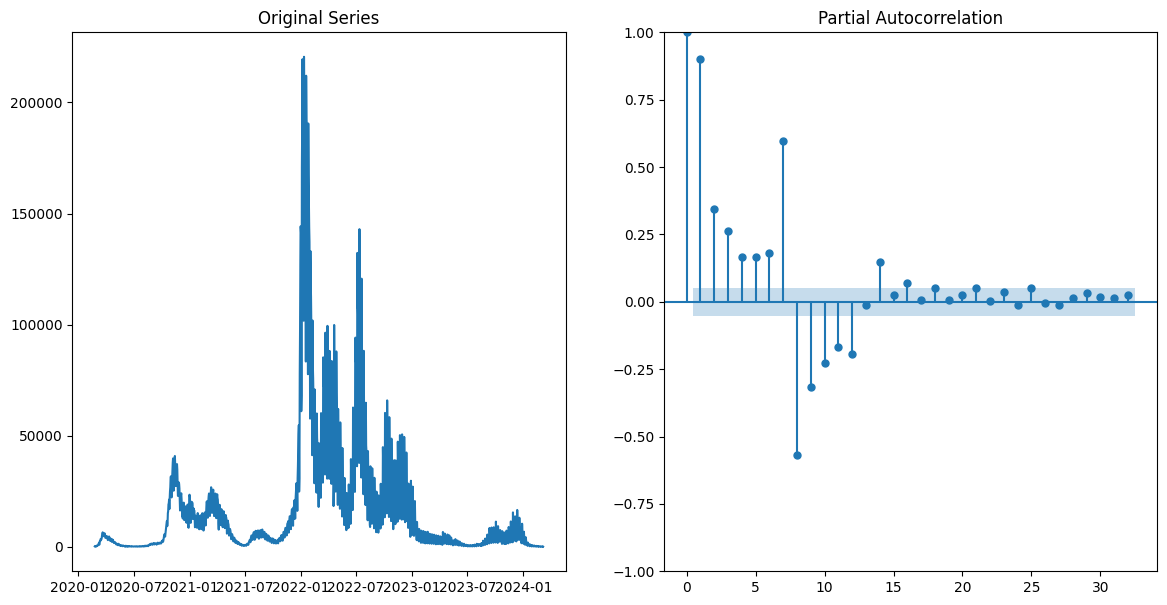

In [8]:
fig, axes = plt.subplots(1, 2)
axes[0].plot(df_italy)
axes[0].set_title('Original Series')
axes[1].set(ylim=(0, 5))
plot_pacf(df_italy, ax=axes[1])
plt.show()

### ARIMA

In [9]:
results=pm.auto_arima(df_italy, start_p=0, d=None, start_q=0, max_p=3, max_q=3,
                      seasonal=False, m=0, D=None, test='adf', start_P=0, start_Q=0, max_P=3, max_Q=3, #seasonal=True, m=7
                      information_criterion='aic', trace=True, error_action='ignore',
                      trend=None,with_intercept=True, stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=34536.393, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=32095.208, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=33341.333, Time=0.33 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=34989.266, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=31909.944, Time=0.14 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=31806.600, Time=0.20 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=31717.623, Time=0.49 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=31736.112, Time=0.35 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=31599.273, Time=0.78 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=31602.629, Time=0.36 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=31996.154, Time=1.64 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=31752.769, Time=1.57 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=31598.037, Time=0.42 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=31600.324, Time=0.29 sec
 ARIMA(3,0,1)(0,0,0

In [10]:
model = ARIMA(df_italy, order=(3, 0, 2))
model_fit = model.fit()
print(model_fit.summary())

c:\Users\chris\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\chris\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\chris\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\chris\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\chris\App

                               SARIMAX Results                                
Dep. Variable:         nuovi_positivi   No. Observations:                 1473
Model:                 ARIMA(3, 0, 2)   Log Likelihood              -15792.122
Date:                Fri, 08 Mar 2024   AIC                          31598.244
Time:                        14:33:52   BIC                          31635.310
Sample:                    02-24-2020   HQIC                         31612.065
                         - 03-06-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.794e+04    1.9e+04      0.945      0.345   -1.93e+04    5.51e+04
ar.L1          0.1886      0.018     10.673      0.000       0.154       0.223
ar.L2          0.7391      0.013     55.549      0.0

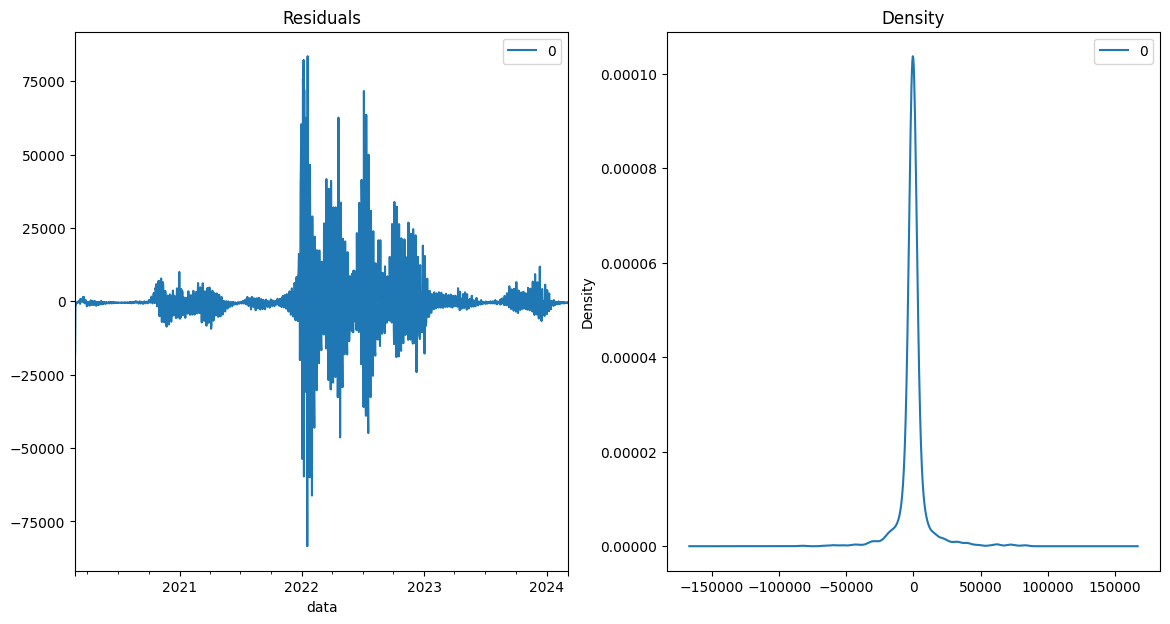

In [11]:
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

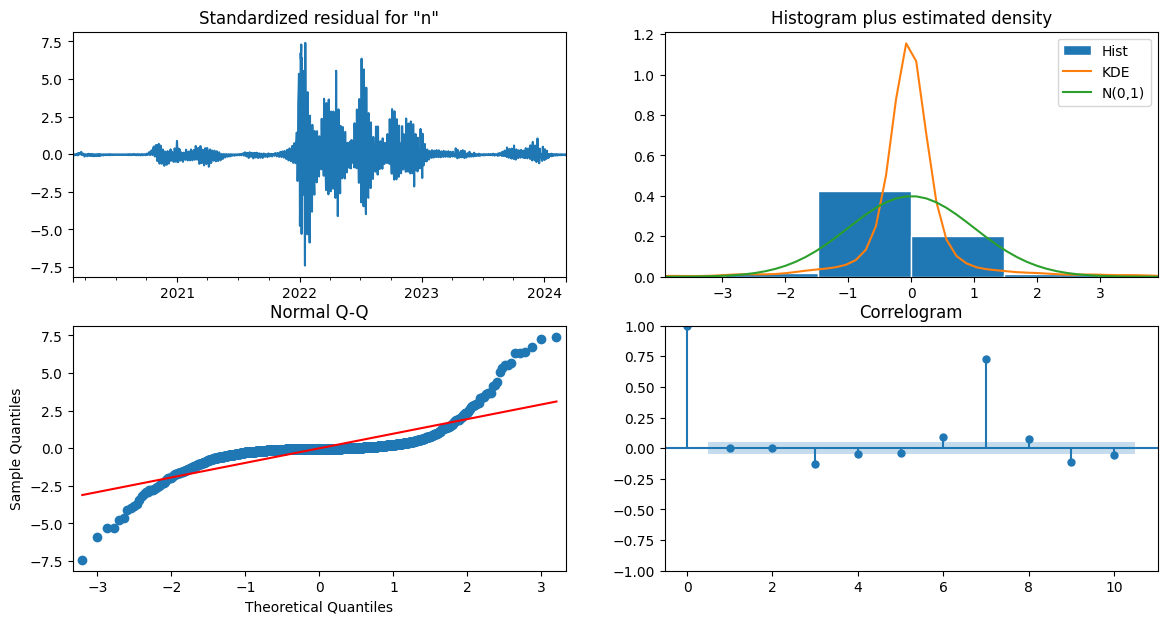

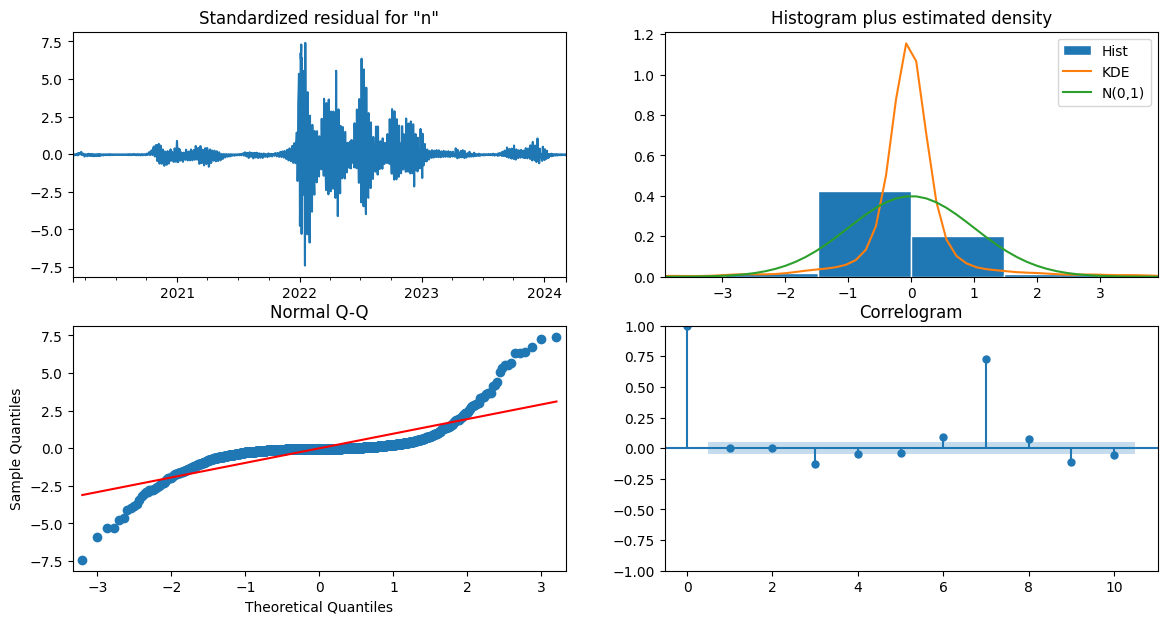

In [12]:
model_fit.plot_diagnostics()

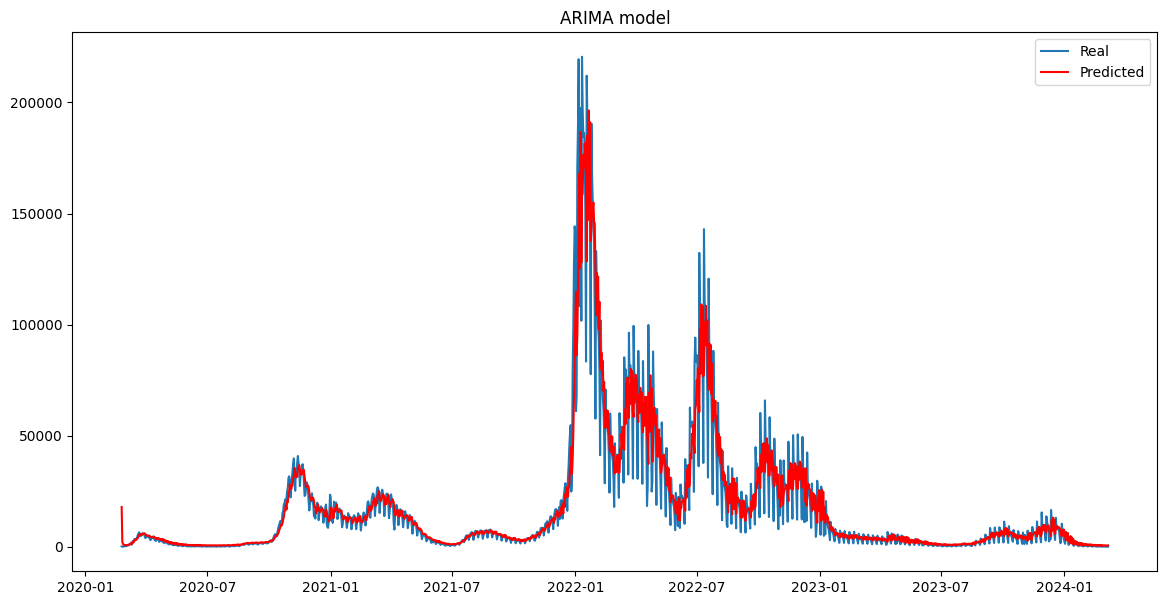

In [13]:
predictions = model_fit.predict(dynamic=False)
plt.plot(df_italy)
plt.plot(predictions, color='red')
plt.title('ARIMA model')
plt.legend(['Real', 'Predicted'])
plt.show()

In [14]:
''' DA ELIMINARE

# Split dataset
train = df_italy[:85]
test = df_italy[85:]

# Model
model = ARIMA(train, order=(3, 0, 2))
fitted = model.fit()

# Forecast
fc, se, conf = fitted.forecast(15, alpha=0.05)

# Pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

#Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()
'''

" DA ELIMINARE\n\n# Split dataset\ntrain = df_italy[:85]\ntest = df_italy[85:]\n\n# Model\nmodel = ARIMA(train, order=(3, 0, 2))\nfitted = model.fit()\n\n# Forecast\nfc, se, conf = fitted.forecast(15, alpha=0.05)\n\n# Pandas series\nfc_series = pd.Series(fc, index=test.index)\nlower_series = pd.Series(conf[:, 0], index=test.index)\nupper_series = pd.Series(conf[:, 1], index=test.index)\n\n#Plot\nplt.figure(figsize=(12,5), dpi=100)\nplt.plot(train, label='training')\nplt.plot(test, label='actual')\nplt.plot(fc_series, label='forecast')\nplt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.15)\nplt.title('Forecast vs Actuals')\nplt.legend(loc='upper left', fontsize=8)\nplt.show()\n"

In [15]:
# Split dataset
train = df_italy[:int(0.85*len(df_italy))]
test = df_italy[int(0.85*len(df_italy)):]

# Model
model = ARIMA(train, order=(3, 0, 2))
fitted = model.fit()

forecast_window = len(df_italy) - int(0.85*len(df_italy)) # forecasting window

'''
preds = fitted.get_prediction(start=test.index[0], end=test.index[-1])
mean_prediction = preds.predicted_mean

confi_int_p = preds.conf_int()
lower_limits_p = confi_int_p.iloc[:,0]
upper_limits_p = confi_int_p.iloc[:,1]

lower_today = np.full([1, len(test)], np.nan).flatten() #empty list with length = test length
upper_today = np.full([1, len(test)], np.nan).flatten() #empty list with length = test length

arima_prediction = pd.DataFrame({'yhat':mean_prediction, 'y_lower':lower_today, 'y_upper': upper_today})
'''

forecast = fitted.get_forecast(steps=forecast_window, alpha=0.05)
mean_forecast = forecast.predicted_mean

#Confidence Intervals for forecasting
confi_int_f = forecast.conf_int()
lower_limits_f = confi_int_f.iloc[:,0]
upper_limits_f = confi_int_f.iloc[:,1]
arima_forecast = pd.DataFrame({'yhat':mean_forecast, 'y_lower':lower_limits_f, 'y_upper':upper_limits_f})

c:\Users\chris\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\chris\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\chris\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\chris\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\chris\App

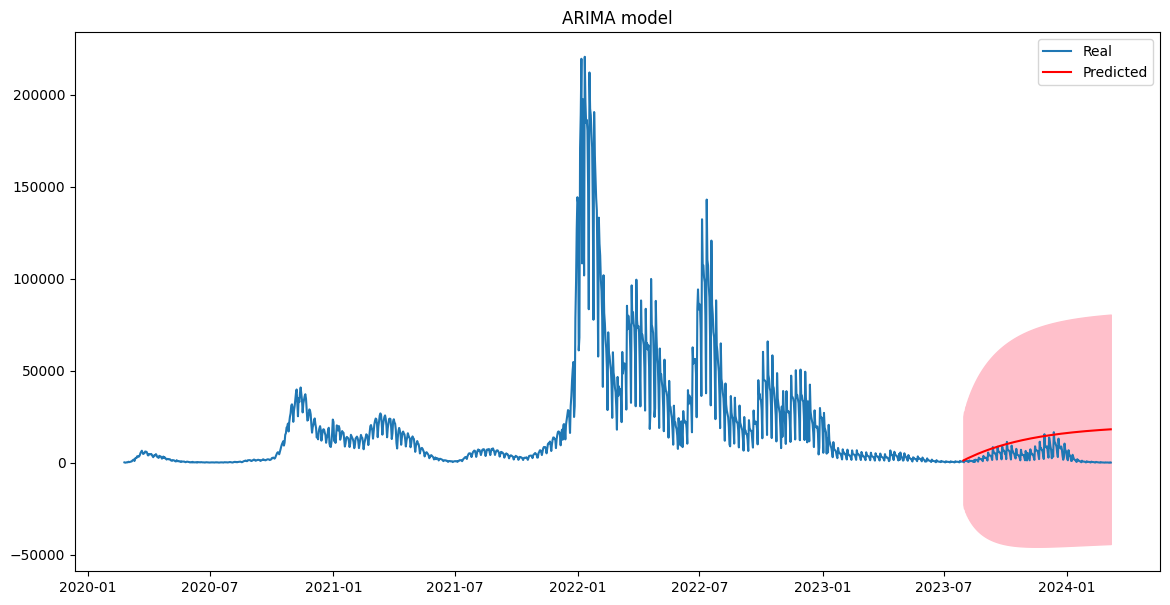

In [16]:
plt.plot(df_italy, label='Observed')
plt.plot(arima_forecast['yhat'], color='red', label='Predicted')
plt.fill_between(arima_forecast.index, arima_forecast['y_lower'], arima_forecast['y_upper'], color='pink')
plt.title('ARIMA model')
plt.legend(['Real', 'Predicted'])
plt.show()

In [17]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(forecast-actual)[1]   # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 'acf1':acf1,
            'mpe': mpe, 'rmse':rmse, 'corr':corr, 'minmax':minmax})

print('Forecast metrics of: ARIMA')
accuracy_prod = forecast_accuracy(mean_forecast.values, test.values.flatten())
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))

Forecast metrics of: ARIMA
mape :  20.0115
me :  8860.8876
mae :  8897.4375
acf1 :  0.8715
mpe :  20.0086
rmse :  10568.3761
corr :  0.0174
minmax :  0.6706


### SARIMAX

In [18]:
is_holiday = [1 if x==True else 0 for x in [day in holidays.Italy() for day in df_italy.index]]

df_italy['holiday'] = is_holiday

In [19]:
results=pm.auto_arima(df_italy.nuovi_positivi, start_p=0, d=None, start_q=0, max_p=3, max_q=3,
                      seasonal=True, m=7, D=None, test='adf', start_P=0, start_Q=0, max_P=3, max_Q=3,
                      information_criterion='aic', trace=True, error_action='ignore',
                      trend=None, exog=df_italy['holiday'],with_intercept=True, stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=34536.393, Time=0.04 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=30548.206, Time=1.55 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=32186.338, Time=0.84 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=34989.266, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[7] intercept   : AIC=32095.208, Time=0.08 sec
 ARIMA(1,0,0)(2,0,0)[7] intercept   : AIC=30547.186, Time=3.10 sec
 ARIMA(1,0,0)(3,0,0)[7] intercept   : AIC=30578.910, Time=4.78 sec


KeyboardInterrupt: 

In [ ]:
model=SARIMAX(df_italy.nuovi_positivi, order=(2, 0, 1), seasonal_order=(1, 0, 3, 30), exog = df_italy['holiday'])
results=model.fit()
results.summary()

c:\Users\chris\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\chris\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\chris\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                         SARIMAX Results                                          
==================================================================================================
Dep. Variable:                             nuovi_positivi   No. Observations:                 1466
Model:             SARIMAX(2, 0, 1)x(1, 0, [1, 2, 3], 30)   Log Likelihood              -15825.812
Date:                                    Thu, 07 Mar 2024   AIC                          31669.625
Time:                                            10:44:01   BIC                          31717.237
Sample:                                        02-24-2020   HQIC                         31687.383
                                             - 02-28-2024                                         
Covariance Type:                                      opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
holiday     2.014e+04    952.879     21.138      0.000    1.83e+04     2.2e+04
ar.L1          1.1345      0.019     59.718      0.000       1.097       1.172
ar.L2         -0.1380      0.018     -7.643      0.000      -0.173      -0.103
ma.L1         -0.7335      0.013    -57.384      0.000      -0.759      -0.708
ar.S.L30       0.5779      0.319      1.812      0.070      -0.047       1.203
ma.S.L30      -0.7570      0.320     -2.366      0.018      -1.384      -0.130
ma.S.L60       0.0226      0.067      0.338      0.735      -0.108       0.154
ma.S.L90       0.0114      0.049      0.230      0.818      -0.086       0.108
sigma2      1.557e+08      0.081   1.91e+09      0.000    1.56e+08    1.56e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.14   Jarque-Bera (JB):             19670.60
Prob(Q):                              0.71   Prob(JB):                         0.00
Heteroskedasticity (H):               1.90   Skew:                             1.09
Prob(H) (two-sided):                  0.00   Kurtosis:                        20.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.07e+23. Standard errors may be unstable.
"""

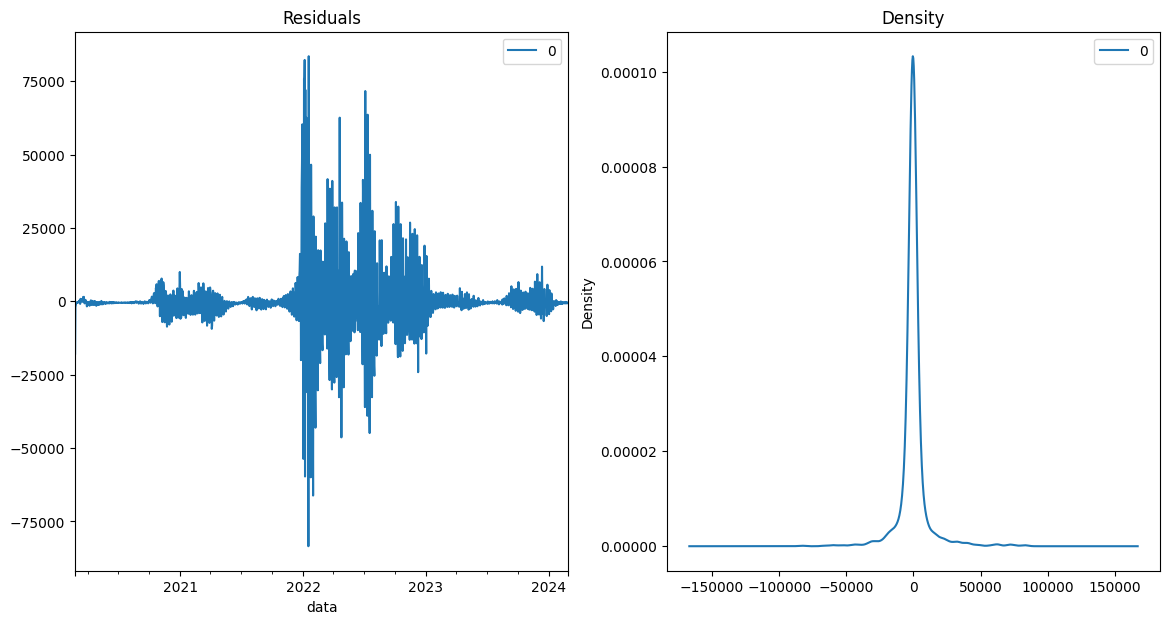

In [ ]:
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

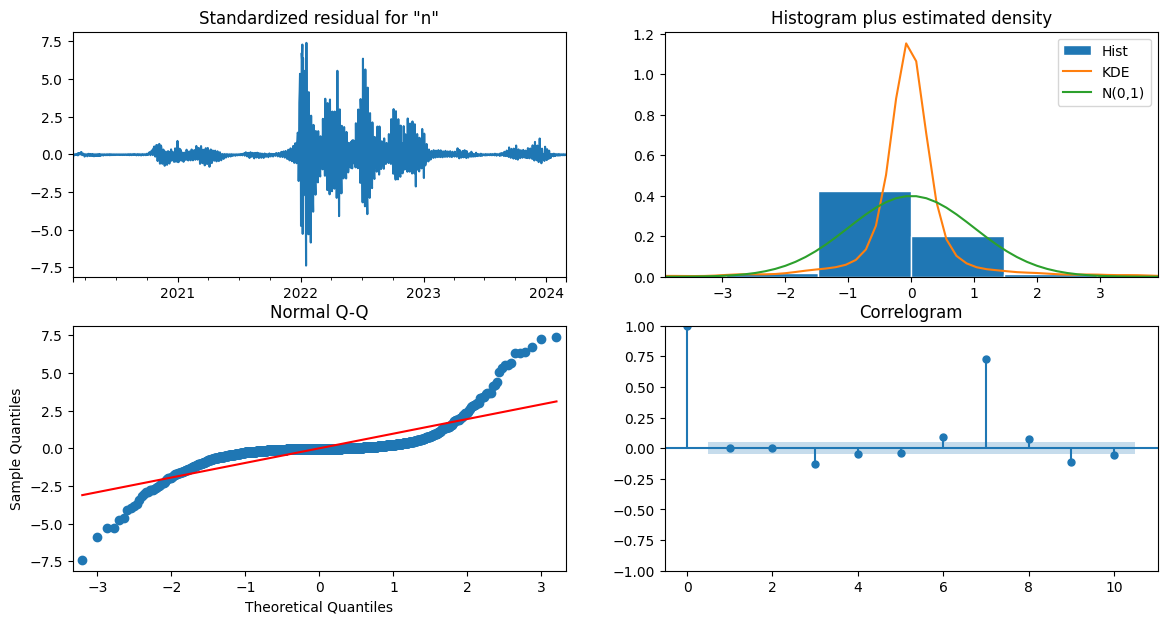

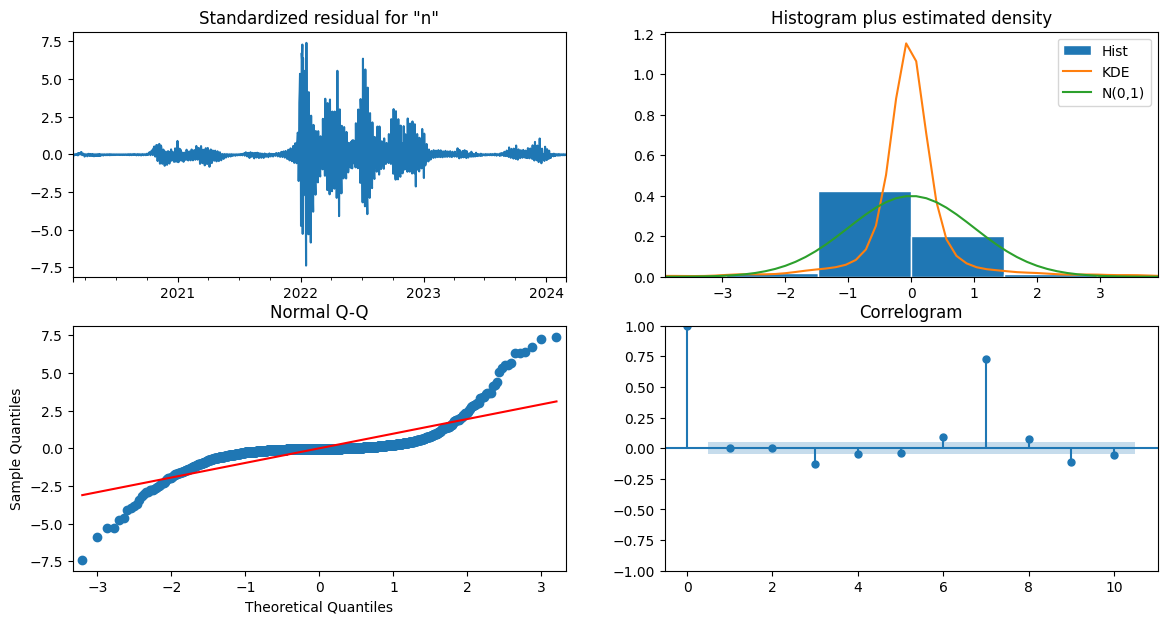

In [ ]:
model_fit.plot_diagnostics()

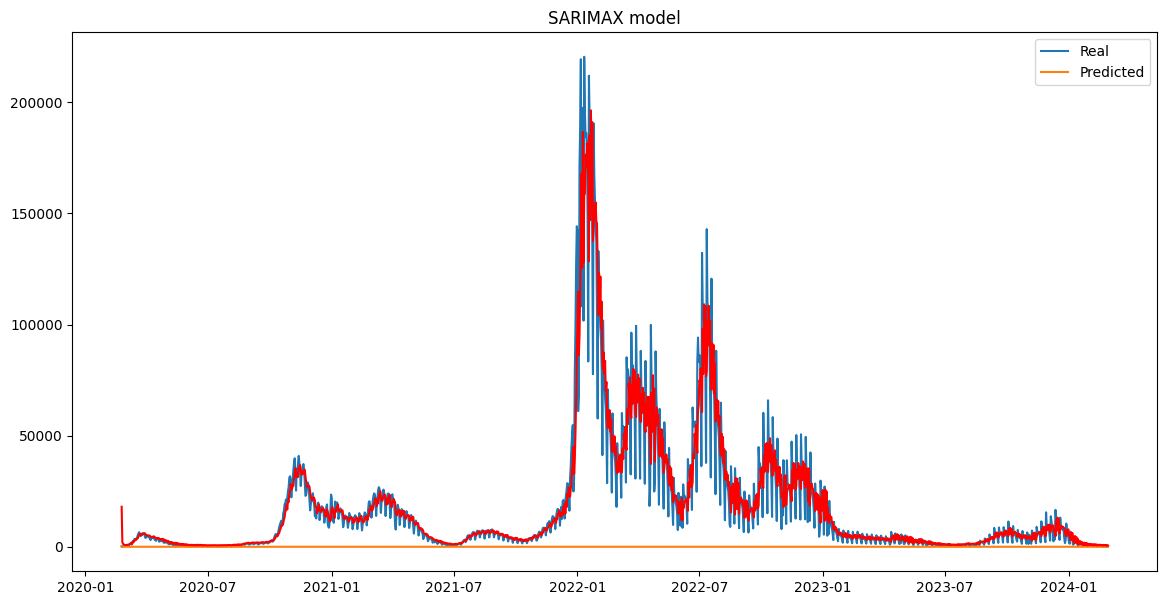

In [ ]:
predictions = model_fit.predict(dynamic=False)
plt.plot(df_italy)
plt.plot(predictions, color='red')
plt.title('SARIMAX model')
plt.legend(['Real', 'Predicted'])
plt.show()

In [ ]:
# Split dataset
train = df_italy[:int(0.85*len(df_italy))]
test = df_italy[int(0.85*len(df_italy)):]

# Model
model = SARIMAX(endog=train.nuovi_positivi, exog=train.holiday, order=(2, 0, 1), seasonal_order=(1, 0, 3, 7))
fitted = model.fit()

forecast_window = len(df_italy) - int(0.85*len(df_italy)) # forecasting window

forecast = fitted.get_forecast(steps=forecast_window, exog = df_italy['holiday'].iloc[-forecast_window:], alpha=0.05)
mean_forecast = forecast.predicted_mean

#Confidence Intervals for forecasting
confi_int_f = forecast.conf_int()
lower_limits_f = confi_int_f.iloc[:,0]
upper_limits_f = confi_int_f.iloc[:,1]
sarimax_forecast = pd.DataFrame({'yhat':mean_forecast, 'y_lower':lower_limits_f, 'y_upper':upper_limits_f})

c:\Users\chris\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\chris\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\chris\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\chris\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning 

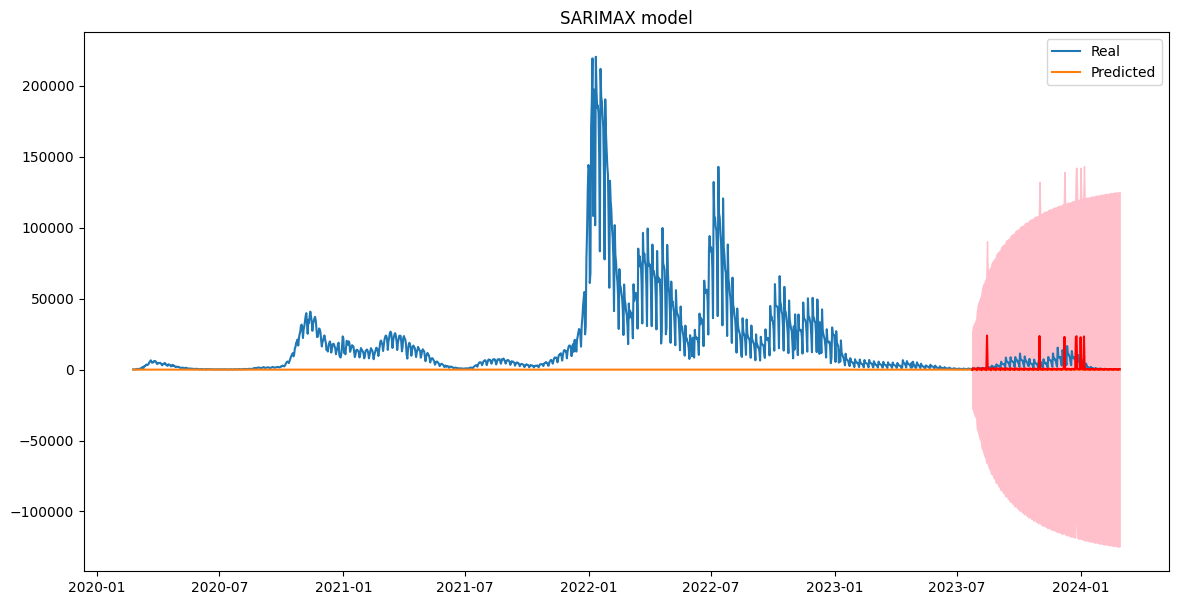

In [ ]:
plt.plot(df_italy, label='Observed')
plt.plot(sarimax_forecast['yhat'], color='red', label='Predicted')
plt.fill_between(sarimax_forecast.index, sarimax_forecast['y_lower'], sarimax_forecast['y_upper'], color='pink')
plt.title('SARIMAX model')
plt.legend(['Real', 'Predicted'])
plt.show()